# Lab 8: Numerical Integration (#2)

Welcome to Lab 08! Throughout the course you will complete a lab assignments like this one. You can't learn technical subjects without hands-on practice, so labs are an important part of the course.

Collaborating on labs is more than okay -- it's encouraged. You should rarely remain stuck for more than a few minutes on questions in labs, so ask a neighbor or an instructor for help. Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it. You should **not** just copy/paste someone else's code, but rather work together to gain understanding of the task you need to complete. 

In today's lab, you'll learn:

- How to implement Simpson's rule

- How to implement Romberg integration


To receive credit for a lab, answer all questions correctly and submit before the deadline.

**Due Date:** Monday, April 29, 2024 at 4:59 pm

**Collaboration Policy:** Labs are a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below**.

**Collaborators:** Got help from Vikas. 

List collaborators here.

Run the cell below to import the required modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

Before we get started let's review two things:

- `np.linspace()`

- `lambda` functions

## 0. Review

The `np.linspace()` function returns evenly spaced numbers over a specified interval. For example, 

`np.linspace(0, 10, 11)` 

would return 

`array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])`. 

Since this is an array object we can iterate over each element. Remember, Python gives the index value 0 for the first element. For example, if we saved our array to `x`

`x = np.linspace(0, 10, 11)` 

then ran the command 

`x[1]`

we would get 1. If instead we wanted the first element, then we would need to run `x[0]`.

Try it for yourself.

In [3]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [4]:
x = np.linspace(0, 10, 11)
x[1]

1.0

In [5]:
x[0]

0.0

If we wanted to access elements 1, 3, 5, 7, and 9 we could slice the array

```
x[1::2]
```

or, if we wanted to access elements 2, 4, 6, and 8 

```
x[2::2]
```

Try it for yourself.

In [6]:
x[1::2]

array([1., 3., 5., 7., 9.])

In [7]:
x[2::2]

array([ 2.,  4.,  6.,  8., 10.])

Let's examine what happens when we run the command

```
x[1::2]
```

Slicing in Python means taking elements from one given index to another given index.

- We pass slice instead of index like this: `[start:end]`.

- We can also define the step, like this: `[start:end:step]`.

- If we don't pass start its considered 0.

- If we don't pass end its considered length of array in that dimension.

- If we don't pass step its considered 1.

So our command 

```
x[1::2]
```

means to start at the **second** element in the array, end at the next to the last element, and use a step size of 2.

**Note:** The end will not be included in the slice. For example, `x[:2]` would return `array([0., 1.])`. If we wanted to include 2, then we would need to run `x[:3]`.



We can use an array to provide the inputs for a `lambda` function. Remember the syntax for a `lambda` function is 

```
f = lambda x: x**2
```

If we define `f` we input the values from our array into `f`


```
f([x[1::2])
```

Try it and see.

In [8]:
x[:2]

array([0., 1.])

In [9]:
x[:3]

array([0., 1., 2.])

In [10]:
f = lambda x: x**2

f(x[1::2])

array([ 1.,  9., 25., 49., 81.])

Throughout this notebook you can use `np.linspace` and `lambda` functions to help you complete the exercises. 

**Note:** There are other methods that can be used to accomplish the same task. Feel free to use other methods, if you have experience using Python. 

## 1. Graphing 

Let's write a lambda functions that we can use to graph each function over its interval of integration.

**Question 1.** Write a lambda function to sketch the graph of $f(x)=\sin x$ from $0$ to $\pi/2$.

**Hint:** Use sine from numpy (e.g., `np.sin`)

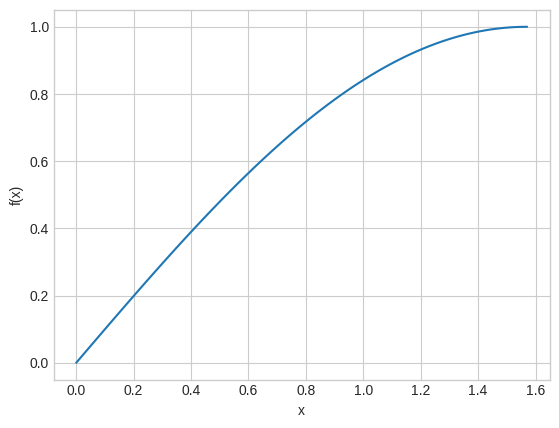

In [13]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
x_values = np.linspace(0, np.pi/2, 100)
y_values = f(x_values)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

## 2. Simpson's Rule

Simpson's Rule (named after the English mathematician Thomas Simpson 1710−1761) is a numerical method that approximates the value of a definite integral by using quadratic functions. The rule is based on the fact that given three points, we can find the equation of a quadratic through those points. To obtain an approximation of the definite integral 

$$\int_a^b f(x) \ dx$$
 
using Simpson's Rule, we partition the interval $[a,b]$ into an even number $n$ of subintervals, each of width

$$\Delta x = \frac{b-a}{n}$$

On each pair of consecutive subintervals $\left[x_{i-1}, x_i \right], \left[x_i, x_{i+1} \right]$ we consider a quadratic function $f(x)=ax^2+bx+c$ such that it passes through the points $\left(x_{i-1}, f\left(x_{i-1} \right) \right), \left(x_i, f\left(x_i \right) \right), \left(x_{i+1}, f\left(x_{i+1} \right) \right)$.


If the function $f(x)$ is continuous on $[a,b]$, then 

$$\int_a^b f(x) \  dx \approx \frac{\Delta x}{3}\left[f\left(x_0 \right)+4f\left(x_1 \right)+2f\left(x_2 \right)+4f\left(x_3 \right) + 2f\left(x_4 \right) + \cdots +4f\left(x_{n-1} \right) + f\left(x_n \right) \right]$$

The coefficients in Simpon's Rule have the following pattern $1,4,2,4,2,\ldots,4,2,4,1$.

Our goal is to write a Python function to approximate the value of a definite integral using Simpson's Rule.

**Question 2.** Write a function which takes input parameters f, a, b and n and returns the Simpson's rule approximation of the definite integral of $f(x)$ on the interval $[a, b]$. Furthermore, let's assign a default value of $n=10$.

**Hint:** Look back at your work from Lab7 - you may find looking at the trapezoid method you wrote helpful - modifying it may be better than starting from "scratch".

In [24]:
def simpsons_rule(f, a, b, n=10):
    """
    Purpose
    -------
    Approximate the integral of f(x) from a to b by Simpson's rule.

    Parameters
    ----------
    f : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    n : int, optional
        The number of subintervals of [a, b]. Default is 10.

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using Simpson's rule.
    """
    if n % 2 != 0:
        raise ValueError("The number of subintervals (n) must be even.")

    h = (b - a) / n
    x_values = [a + i * h for i in range(n + 1)]
    sum_odd = sum(f(x) for x in x_values[1:-1:2])
    sum_even = sum(f(x) for x in x_values[2:-2:2])

    integral_approximation = (h / 3) * (f(a) + 4 * sum_odd + 2 * sum_even + f(b))
    return integral_approximation

Run the cell below to make sure your function is correct. It should return `2.0001095173150043`.

In [25]:
simpsons_rule(lambda x : np.sin(x), 0, np.pi, 10)

2.0001095173150043

**Question 3.** Use your function to approximate the value of $\displaystyle \int_1^{1.6} \frac{2x}{x^2-4} \ dx$. Use $n=2$, $n=4$, then $n=8$ subintervals. (For a quick "reality check," the actual value of the integral is $-\ln(25/12)\$, so the approximations should be getting closer to that value.

In [42]:
actual_value = -np.log(25/12)
for n in [2, 4, 8]:
    integral_approximation = simpsons_rule(f, a, b, n)
    print(f"n = {n}:", integral_approximation)

n = 2: -0.7391053391053395
n = 4: -0.7344659602971626
n = 8: -0.7340063101889207


**Question 4.** Given the actual value of $\displaystyle \int_1^{1.6} \frac{2x}{x^2-4} \ dx$ to be $-ln(25/12)$, compute the error associated with each of the three approximations from Question 3. By what (approximate) factor should you see the error shrink as $n$ is doubled? Is your observation of the error consistent with this expectation? (**Hint:** Use np.log for the natural log function.)



In [43]:
errors = []
for n in [2, 4, 8]:
    integral_approximation = simpsons_rule(f, a, b, n)
    approximations.append(integral_approximation)
    error = np.abs(actual_value - integral_approximation)
    errors.append(error)
    print(f"Error when n = {n}:", error)

Error when n = 2: 0.005136164025138945
Error when n = 4: 0.000496785216962059
Error when n = 8: 3.7135108720165455e-05


*use this markdown cell for the last part of Q4*

## 3. Romberg Integration

Remember the Romberg integration technique from class:

1. Compute trapezoid approximations using $n=1$ and $n=2$.
2. Apply Richardson Extrapolation (note this is the same value as if we did Simpson for $n=2$ - but do not use Simpson's rule here - use the extrapolation formula).
3. Do it again!
    1. Trapezoid for $n=4$
    2. Richardson Extrapolation to 2 most-recent trapezoid approximations
    3. Richardson Extrapolation to 2 most-recent simpson approximations
4. Continue this process - each time we double n, apply Richardson Extrapolation to fill out the row, including adding a new column.

In the end, you're creating a "triangular" matrix of integral approximations - the value to far lower-right is the "best" estimate so far. (Look back in your notes if you need to to see an example.)

**Question 5.** For your final task for this lab, implement Romberg Integration and apply it to the same integral from the previous question: $\displaystyle \int_1^{1.6} \frac{2x}{x^2-4} \ dx$. You may implement this in a number of different ways. One option is to write code to build a two-dimensional array of values, then make a nice table/ display of that array. Another option is to use last week's trapezoid method to make the trapezoid estimates, put those in a spreadsheet, then use the spreadsheet to fill the rest of the columns. In the end, your solution should at a minimum:
1. Show this Romberg process in a triangular matrix of values
2. Include at least 5 rows/ columns
3. Clearly report your "final" approximation to the integral

Note you already computed Simpson approximations for $n=2,4,8$, so you can use those values as a "check" that that column in your table is correct.

In [44]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (np.sum(y) - 0.5 * (y[0] + y[-1]))

def romberg_integration(f, a, b, max_iterations=5):
    romberg_table = np.zeros((max_iterations, max_iterations))

    for i in range(max_iterations):
        n = 2**i
        romberg_table[i, 0] = trapezoidal_rule(f, a, b, n)

        for j in range(1, i + 1):
            romberg_table[i, j] = ((4**j) * romberg_table[i, j - 1] - romberg_table[i - 1, j - 1]) / (4**j - 1)

    return romberg_table

romberg_table = romberg_integration(f, a, b)

print("Romberg Integration Table:")
for i in range(romberg_table.shape[0]):
    for j in range(i + 1):
        print("{:.10f}".format(romberg_table[i, j]), end="\t")
    print()

final_approximation = romberg_table[-1, -1]
print(final_approximation)

Romberg Integration Table:
-0.8666666667	
-0.7709956710	-0.7391053391	
-0.7435983880	-0.7344659603	-0.7341566684	
-0.7364043296	-0.7340063102	-0.7339756668	-0.7339727938	
-0.7345798064	-0.7339716320	-0.7339693201	-0.7339692193	-0.7339692053	
-0.7339692053209335


*alternately, if you use an "external" tool (such as a google sheet), include a link in this markdown cell*

## 5. Submitting your work
You're done with Lab 08! Submit your work by doing the following:

* Save your notebook

* Restart the kernel and run all cells.

* Right-click the `lab08` file in the navigation pane, then click "download."

* Upload the file you just downloaded to the Lab 08 assignment to Gradescope for Grading.